# Crime Data Distribution in London, United Kingdom 

## Setup Libraries and Color

In [ ]:
#Install the library which is required
!pip install geopandas
!pip install palettable

#Check library's version
!pip show numpy
!pip show pandas
!pip show geopandas
!pip show matplotlib

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

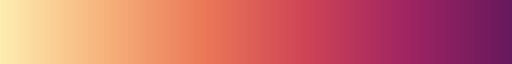

In [45]:
#Import specific colors from Palettable
import matplotlib.colors as colors
from palettable.cmocean.sequential import Matter_7
cmap = colors.LinearSegmentedColormap.from_list('cmap',[colors.hex2color(c) for c in  Matter_7.hex_colors[0:-1]])
cmap

## Python Modules and Libraries Used

List of python libraries used, version, and its purpose for the analysis.

| Library    |     Version | Purpose  |
|------------|-------------|----------|
| numpy      |     1.23.5  | array computing with Python|
| pandas     |     1.5.3   | data structures for data analysis and statistics|
| geopandas  |    0.13.2   | geographic pandas extensions|
|matplotlib| 3.7.1| Python plotting package

## Data used

List the data sets used in the notebook. Indicated data formats for each input data set. Described the most relevant columns/variables for the analysis per each input dataset.

| Data set  |  Format | Source  | Description |
|-----------|---------|---------|-------------|
| [Crime Data](https://data.london.gov.uk/download/recorded_crime_summary/934f2ddb-5804-4c6a-a17c-bdd79b33430e/MPS%20Borough%20Level%20Crime%20%28Historical%29.csv) | CSV |  [London Datastore](https://data.london.gov.uk/) | Crime Data by Borough Level in United Kingdom|
| [Boundary Data](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson) | GeoJson |  [Inside Airbnb](http://insideairbnb.com/get-the-data/) | Boroughs Boundaries in London |

## Data Preparation Phase - Collection, Cleaning, and Conversion

### Load Data

In [46]:
#Read the crime data in London
url_data_crime = "https://data.london.gov.uk/download/recorded_crime_summary/934f2ddb-5804-4c6a-a17c-bdd79b33430e/MPS%20Borough%20Level%20Crime%20%28Historical%29.csv"
crime_data = pd.read_csv(url_data_crime, sep=",")

#Rename the column to Borough
crime_data = crime_data.rename(columns={'LookUp_BoroughName': 'Borough'})
crime_data.head()

,MajorText,MinorText,Borough,201004,201005,201006,201007,201008,201009,201010,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,11,10,6,6,13,...,6,4,6,6,5,4,12,5,7,6
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208,193,227,220,204,163,199,...,104,80,99,128,141,130,144,111,126,109
2,Burglary,Burglary Business and Community,Barking and Dagenham,49,58,59,47,46,51,52,...,18,14,12,30,24,21,29,27,37,20
3,Burglary,Domestic Burglary,Barking and Dagenham,118,102,124,137,153,136,116,...,90,71,75,81,66,61,87,62,83,87
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,6,5,12,9,7,11,...,11,12,9,9,7,6,11,19,18,12


In [47]:
#Read and load the neighbourhoods data 
boroughs = gpd.read_file("http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson")
boroughs = boroughs.drop(["neighbourhood_group"], axis=1).rename(columns={'neighbourhood': 'Borough'})

## Visualise the Borough in London

Text(0.5, 1.0, 'Boroughs Boundaries in London')

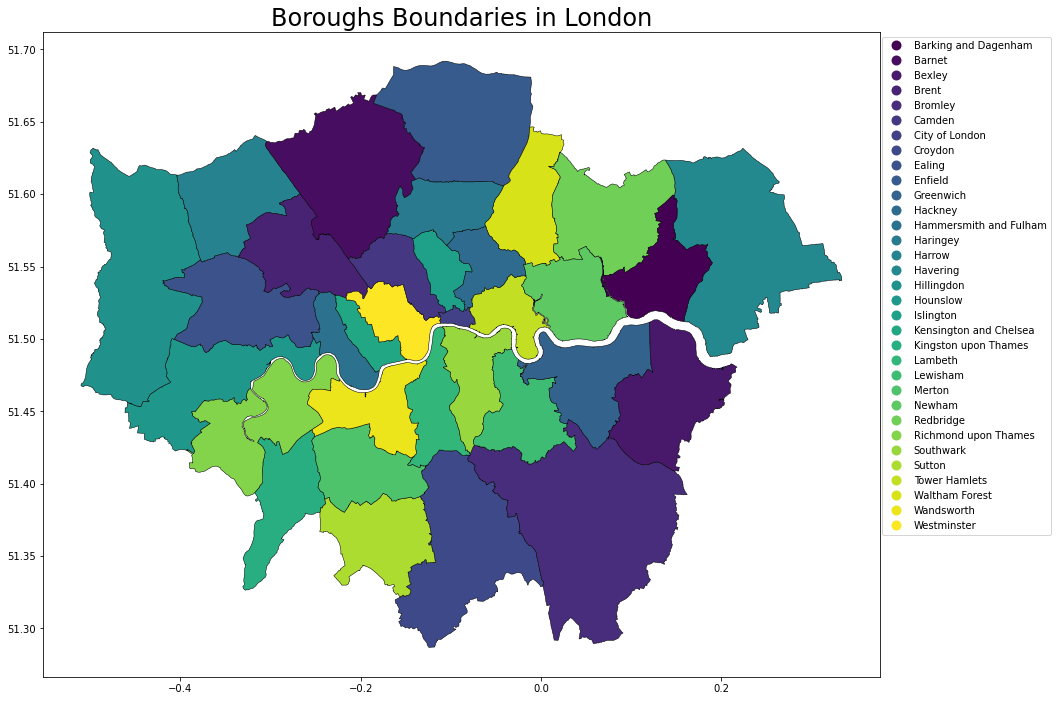

In [48]:
boroughs.plot('Borough', legend=True, edgecolor='k', linewidth=0.5, cmap="viridis", figsize=(15, 15), 
                    legend_kwds={'fontsize': 10, 'markerscale': 1, 'bbox_to_anchor': (1.21, 1),'loc': 'upper right'})
plt.title('Boroughs Boundaries in London', fontsize=24)

## Prepare the Crime Data in London by Boroughs

In [49]:
#Firstly, in order to examine the crime data well, it is merged on 'Borough' column. 
crime_boroughs = pd.merge(boroughs, crime_data, how="inner", on=["Borough"])

#Secondly, dissolve function is used by 'Borough'
crime_boroughs = crime_boroughs.dissolve(by='Borough', aggfunc='sum').reset_index()

crime_boroughs.head()

,Borough,geometry,201004,201005,201006,201007,201008,201009,201010,201011,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,Barking and Dagenham,"MULTIPOLYGON (((0.07274 51.52957, 0.07271 51.5...",1648,1636,1732,1768,1671,1592,1591,1605,...,1437,1585,1639,1697,1782,1736,1626,1703,1862,1779
1,Barnet,"POLYGON ((-0.19911 51.66851, -0.19900 51.66821...",2024,2074,2249,2156,2032,2133,2225,2140,...,1896,2496,2263,2438,2505,2277,2188,2329,2401,2291
2,Bexley,"POLYGON ((0.12495 51.51298, 0.12506 51.51302, ...",1207,1264,1244,1186,1182,1103,1156,1242,...,1011,1267,1153,1226,1270,1280,1278,1306,1372,1433
3,Brent,"POLYGON ((-0.19711 51.52795, -0.19716 51.52794...",2460,2528,2401,2675,2448,2348,2425,2478,...,2079,2257,2104,2447,2396,2662,2503,2408,2706,2493
4,Bromley,"POLYGON ((0.01171 51.30041, 0.01165 51.30054, ...",1868,1942,1870,1838,1780,1660,1894,1851,...,1584,1843,1850,1896,1860,1929,1740,2003,2141,2176


In [50]:
crime_boroughs.columns

Index(['Borough', 'geometry', '201004', '201005', '201006', '201007', '201008',
       '201009', '201010', '201011',
       ...
       '202102', '202103', '202104', '202105', '202106', '202107', '202108',
       '202109', '202110', '202111'],
      dtype='object', length=142)

In [51]:
#This function will calculate all related columns and create another new column related with these columns
#In order to clean all columns such as "201004" and make it only "2010"
def create_column_years(df, start_year, end_year):
    for year in range(start_year, end_year + 1):
        prefix = str(year)
        relevant_columns = [col for col in df.columns if col.startswith(prefix)]

        if relevant_columns:
            df[prefix] = df[relevant_columns].sum(axis=1)
        else:
            print(f"No columns with prefix {prefix} found.")

# Example usage
# Assuming you have a DataFrame called 'crime_boroughs'
create_column_years(crime_boroughs, start_year=2010, end_year=2021)

In [52]:
crime_boroughs = crime_boroughs[["Borough", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019",
                                 "2020", "2021","geometry"]]
crime_boroughs.head()

,Borough,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,geometry
0,Barking and Dagenham,14454,18533,17297,16500,16210,17167,17753,18670,18309,20201,19187,18252,"MULTIPOLYGON (((0.07274 51.52957, 0.07271 51.5..."
1,Barnet,18937,26174,25595,23163,23000,24584,25678,26957,28263,31577,27388,24926,"POLYGON ((-0.19911 51.66851, -0.19900 51.66821..."
2,Bexley,10526,12283,12333,11896,12187,12335,13399,14804,15369,18062,15601,13674,"POLYGON ((0.12495 51.51298, 0.12506 51.51302, ..."
3,Brent,21867,30556,28287,24457,25103,25579,27618,29707,30778,30451,28799,25990,"POLYGON ((-0.19711 51.52795, -0.19716 51.52794..."
4,Bromley,16314,22007,20586,19422,20152,21055,20692,22751,23187,25176,22013,20522,"POLYGON ((0.01171 51.30041, 0.01165 51.30054, ..."


In [53]:
#Find maximum crime counts in 2021 which is the most recent date and indicate the Borough in London
max_value = crime_boroughs['2021'].max()
max_borough = crime_boroughs.loc[crime_boroughs['2021'].idxmax(), 'Borough']

# Using an f-string to format the output
print(f"The maximum crime value in 2021 is: {max_value} in the borough of {max_borough}.")

The maximum crime value in 2021 is: 44883 in the borough of Westminster.


## Data Visualisation

(-0.5525760000000001, 0.37626400000000004, 51.2665031, 51.7121329)

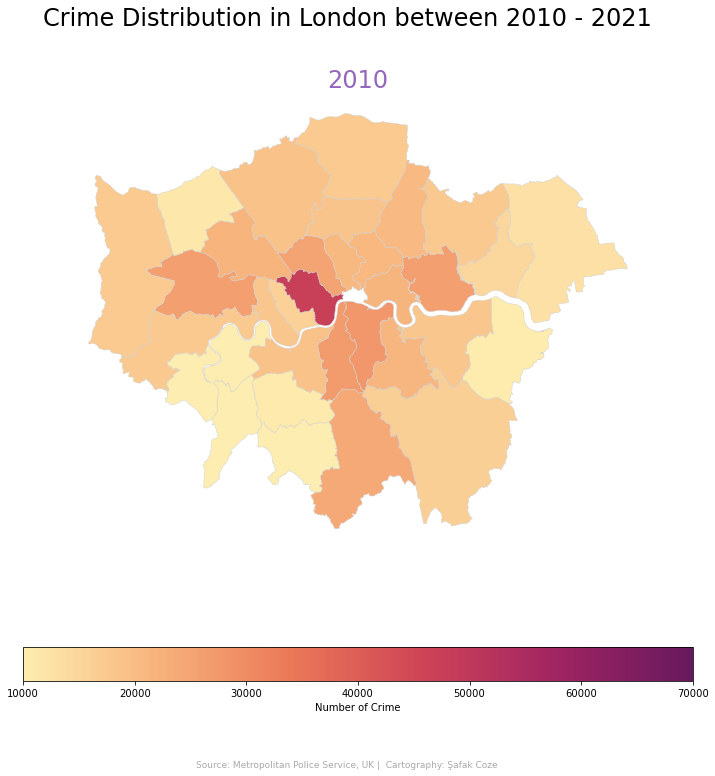

In [76]:
#This is just an example for the next step
#The map is generated will look like map which is called "2010"
crime_boroughs.plot(column="2010", legend=True, edgecolor="lightgray", linewidth=0.5, cmap=cmap, figsize=(12, 12),
                   legend_kwds={"label": "Number of Crime", "orientation": "horizontal"}, vmin=10000, vmax=70000)

plt.suptitle("Crime Distribution in London between 2010 - 2021", fontsize=24)
plt.title("2010", fontsize=24, color='C4')

plt.figtext(0.5, 0.1, 'Source: Metropolitan Police Service, UK |  Cartography: Şafak Coze', fontsize=9, 
            ha='center', color="darkgray")

plt.axis('off')

### Save as .png Format by Year

In [79]:
#In order make maps and save these map by iterate over from 2010 to 2022.
years = range(2010, 2022)

for year in years:
    crime_boroughs.plot(column=str(year), legend=True, edgecolor="lightgray", linewidth=0.5, cmap=cmap, figsize=(12, 12),
                        legend_kwds={"label": "Number of Crime", "orientation": "horizontal"}, vmin=10000, vmax=70000)

    plt.suptitle("Crime Distribution in London between 2010 - 2021", fontsize=24)
    plt.title(str(year), fontsize=24, color='C4')
    plt.figtext(0.5, 0.1, 'Source: Metropolitan Police Service, UK |  Cartography: Şafak Coze', fontsize=9, 
            ha='center', color="darkgray")

    plt.axis('off')
    plt.savefig(f"Crime_Distribution_{year}.jpeg", dpi=500)
    plt.close()  # Close the plot to avoid overlapping in the next iteration